<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,81.527372,83.038916,74.842726,51.394653,0.280228,301.083895,300.767690,0.316205
1,0.0,1.0,60.546357,29.809747,94.285940,48.404824,0.085252,243.132119,243.247635,-0.115516
2,0.0,2.0,69.945375,45.886020,63.527253,98.860146,-0.004734,288.214060,288.490945,-0.276885
3,0.0,3.0,68.779923,77.853145,94.665016,23.714689,-0.401283,274.611491,274.905285,-0.293795
4,0.0,4.0,72.531191,93.816103,47.446382,71.667984,-0.268626,295.193035,295.380613,-0.187577
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.166354,48.931834,72.305790,68.514818,-0.569834,257.348961,257.938245,-0.589284
59996,999.0,56.0,88.787742,42.214234,29.446995,81.686852,0.298061,252.433885,252.234266,0.199619
59997,999.0,57.0,97.711146,99.974875,41.370890,39.367601,-0.085235,288.339276,288.519036,-0.179760
59998,999.0,58.0,64.240237,37.155230,30.222671,48.962479,0.438175,191.018793,190.731554,0.287238


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,81.527372,83.038916,74.842726,51.394653,0.280228,301.083895,300.767690,0.316205
1,0.0,1.0,60.546357,29.809747,94.285940,48.404824,0.085252,243.132119,243.247635,-0.115516
2,0.0,2.0,69.945375,45.886020,63.527253,98.860146,-0.004734,288.214060,288.490945,-0.276885
3,0.0,3.0,68.779923,77.853145,94.665016,23.714689,-0.401283,274.611491,274.905285,-0.293795
4,0.0,4.0,72.531191,93.816103,47.446382,71.667984,-0.268626,295.193035,295.380613,-0.187577
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.166354,48.931834,72.305790,68.514818,-0.569834,257.348961,257.938245,-0.589284
59996,999.0,56.0,88.787742,42.214234,29.446995,81.686852,0.298061,252.433885,252.234266,0.199619
59997,999.0,57.0,97.711146,99.974875,41.370890,39.367601,-0.085235,288.339276,288.519036,-0.179760
59998,999.0,58.0,64.240237,37.155230,30.222671,48.962479,0.438175,191.018793,190.731554,0.287238


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

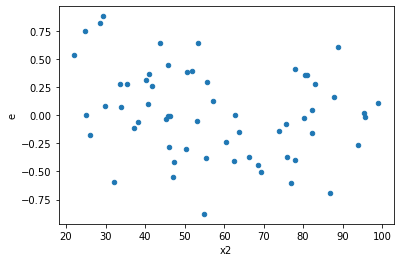

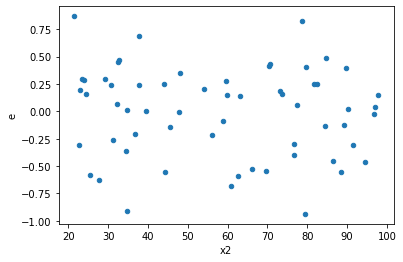

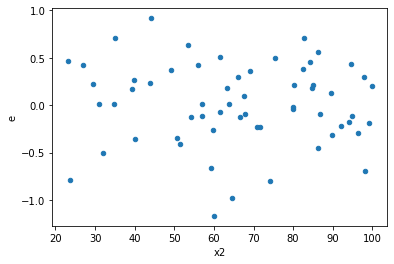

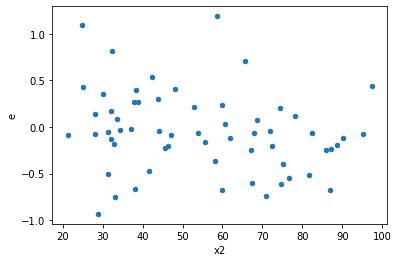

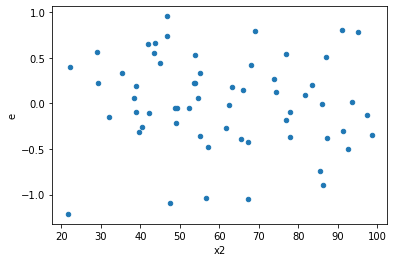

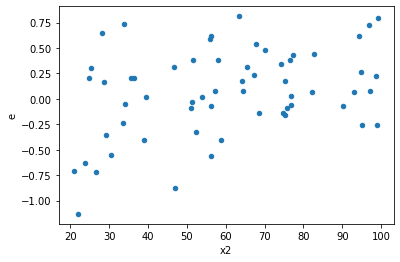

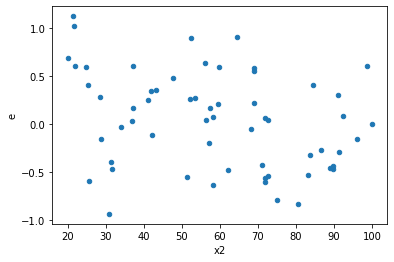

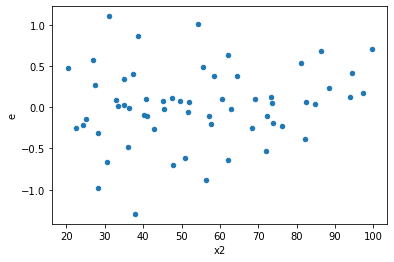

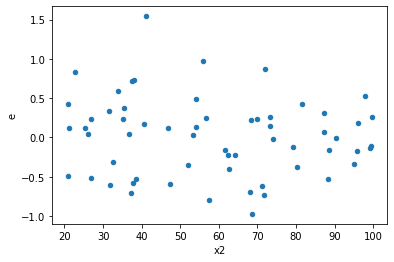

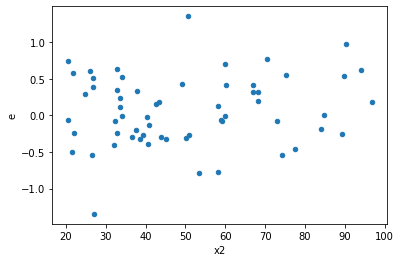

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,24.0,3.909089096680788,3.819651716190544,0.13961032488145672,0.15915215484127268,1.1399741027492698,0.7497207785844533,0.6251396107077734,0.37486038929222665,Reject005=1 : Homoscedasticity
1.0,19.0,33.0,2.550646668775584,6.2732631959021745,0.13424456151450442,0.19009888472430833,1.416063955065838,0.37143940977544765,0.8142802951122762,0.18571970488772382,Reject005=1 : Homoscedasticity
2.0,32.0,20.0,5.419118511711242,4.9903406156766135,0.16934745349097632,0.24951703078383067,1.4734029100539512,0.36583255201261444,0.8170837239936928,0.18291627600630722,Reject005=1 : Homoscedasticity
6.0,28.0,24.0,6.1376008950985765,5.401222549501371,0.2192000319678063,0.22505093956255715,1.026692092798646,0.9552205652534957,0.5223897173732521,0.4776102826267479,Reject005=1 : Homoscedasticity
7.0,23.0,29.0,5.078287858104773,6.6234793858526375,0.22079512426542489,0.22839584089147025,1.034424295605859,0.9201763772548517,0.5399118113725742,0.46008818862742584,Reject005=1 : Homoscedasticity
10.0,34.0,18.0,6.6302817632523,5.70186181077346,0.1950082871544794,0.31677010059852556,1.6243930205263035,0.2758032328158957,0.8620983835920522,0.13790161640794785,Reject005=1 : Homoscedasticity
11.0,22.0,30.0,5.564114526442346,8.47204140371537,0.25291429665647025,0.28240138012384564,1.116589231440037,0.7669987845373187,0.6165006077313406,0.38349939226865937,Reject005=1 : Homoscedasticity
12.0,24.0,28.0,2.306427261010876,6.658228072016452,0.09610113587545316,0.23779385971487327,2.4744125815854408,0.022642146321705692,0.9886789268391472,0.011321073160852846,Reject005=0 : Heteroscedasticity
15.0,23.0,29.0,2.8114261174320068,5.818635111119763,0.12223591814921768,0.2006425900386125,1.6414372557310124,0.20631000484646234,0.8968449975767688,0.10315500242323117,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,24.0,3.909089096680788,3.819651716190544,0.13961032488145672,0.15915215484127268,1.1399741027492698,0.7497207785844533,Reject005=1 : Homoscedasticity
1.0,19.0,33.0,2.550646668775584,6.2732631959021745,0.13424456151450442,0.19009888472430833,1.416063955065838,0.37143940977544765,Reject005=1 : Homoscedasticity
2.0,32.0,20.0,5.419118511711242,4.9903406156766135,0.16934745349097632,0.24951703078383067,1.4734029100539512,0.36583255201261444,Reject005=1 : Homoscedasticity
3.0,23.0,29.0,4.484946175879476,4.163225002353475,0.1949976598208468,0.14355948283977502,0.7362113113135287,0.45512164946715555,Reject005=1 : Homoscedasticity
4.0,28.0,24.0,8.899808385618407,4.2054288369120805,0.31785029948637167,0.17522620153800336,0.5512853120514881,0.13108225856957897,Reject005=1 : Homoscedasticity
5.0,25.0,27.0,6.269061798024513,2.074133843123218,0.2507624719209805,0.0768197719675266,0.3063447707268327,0.003977482080010774,Reject005=0 : Heteroscedasticity
6.0,28.0,24.0,6.1376008950985765,5.401222549501371,0.2192000319678063,0.22505093956255715,1.026692092798646,0.9552205652534957,Reject005=1 : Homoscedasticity
7.0,23.0,29.0,5.078287858104773,6.6234793858526375,0.22079512426542489,0.22839584089147025,1.034424295605859,0.9201763772548517,Reject005=1 : Homoscedasticity
8.0,27.0,25.0,8.360813591561707,3.4689732086735954,0.3096597626504336,0.1387589283469438,0.44810125525926,0.04395422318536848,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      905
Reject005=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64